# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.__version__

'2.0.2'

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.0.2


In [ ]:
# When ran next cell numpy version is not matched with 1.26.4.
# So Install numpy 1.26.4 version
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 23.9 MB/s eta 0:00:00


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('/content/sample_data/trip_records/2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df.shape
# print's number of rows and columns

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

Q) How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

Ans) There are 3041714 rows in above data set. It's not computible or feasible when we have to combine the data for all twelve months into one.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

Q) Keep in mind that you sample by date AND hour, not just hour. (Why?)

Ans) Because trend/pattern of analysis changes for every hour.

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import os

# Select the folder having data files
os.chdir('/content/sample_data/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_modified = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        for date in df_modified['tpep_pickup_datetime'].dt.date.unique():          # Loop through dates and then loop through every hour of each date
            df_date = df_modified[df_modified['tpep_pickup_datetime'].dt.date == date] # Filter the data for the current date

            for hour in range(24):                                                 # Iterate through each hour of the selected date
                df_hour = df_date[df_date['tpep_pickup_datetime'].dt.hour == hour] # Filter the data for the current hour
                sample = df_hour.sample(frac = 0.05, random_state = 42)            # Sample 5% of the hourly data randomly
                sampled_data = pd.concat([sampled_data, sample])                   # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])       # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('trip_records.parquet')

In [ ]:
# to know how many rows decreased from data
df.shape

(1896400, 20)

In [ ]:
trip_records = df

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
trip_records = pd.read_csv('trip_records.parquet')

In [ ]:
# making copy saves original dataframe
trip_records_copy_1 = trip_records.copy()

In [ ]:
trip_records_copy_1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2386,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,N,132,61,...,47.1,1.0,0.5,10.27,0.0,1.0,61.62,0.0,1.75,NaN
1,2441,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,N,230,95,...,45.7,1.0,0.5,4.00,0.0,1.0,54.70,2.5,0.00,NaN
2,3610,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,N,107,162,...,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00,NaN
3,2825,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,N,249,79,...,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.00,NaN
4,2999,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,N,142,41,...,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.00,NaN


In [ ]:
trip_records_copy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# fix the index and drop any columns that are not needed
# in above cell column name with "Unnamed: 0" is storing previous index values which is not required
trip_records_copy_1.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# to display maximum columns
pd.set_option("display.max_columns", None)
# to display maximum rows
# pd.set_option("display.max_rows", None) # --> making it comment because of it Runtime is getting affected ...

In [ ]:
trip_records_copy_1.tail(n = 10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
1896390,1,2023-11-30 23:04:13,2023-11-30 23:08:04,2.0,1.20,1.0,N,236,141,1,7.20,3.5,0.5,2.40,0.00,1.0,14.60,2.5,0.00,NaN
1896391,2,2023-11-30 23:44:13,2023-11-30 23:52:02,NaN,1.01,NaN,NaN,161,141,0,11.33,0.0,0.5,0.00,0.00,1.0,15.33,NaN,NaN,NaN
1896392,2,2023-11-30 23:17:41,2023-11-30 23:32:07,NaN,3.64,NaN,NaN,80,45,0,25.09,0.0,0.5,0.00,0.00,1.0,29.09,NaN,NaN,NaN
1896393,2,2023-11-30 23:27:36,2023-11-30 23:36:30,1.0,1.12,1.0,N,170,230,1,10.00,1.0,0.5,3.00,0.00,1.0,18.00,2.5,0.00,NaN
1896394,2,2023-11-30 23:20:04,2023-11-30 23:30:14,1.0,2.10,1.0,N,48,238,1,12.10,1.0,0.5,3.00,0.00,1.0,20.10,2.5,0.00,NaN
1896395,1,2023-11-30 23:01:23,2023-11-30 23:14:15,NaN,0.00,NaN,NaN,163,238,0,18.73,0.0,0.5,0.00,0.00,1.0,22.73,NaN,NaN,NaN
1896396,2,2023-11-30 23:21:56,2023-11-30 23:36:27,1.0,8.59,1.0,N,138,262,1,33.80,6.0,0.5,10.15,6.94,1.0,62.64,2.5,1.75,NaN
1896397,1,2023-11-30 23:59:24,2023-12-01 00:05:48,1.0,1.50,1.0,N,107,186,1,8.60,2.5,0.5,3.80,0.00,1.0,16.40,2.5,0.00,NaN
1896398,2,2023-11-30 23:25:14,2023-11-30 23:56:49,1.0,7.47,1.0,N,148,202,1,37.30,1.0,0.5,0.00,6.94,1.0,49.24,2.5,0.00,NaN
1896399,2,2023-11-30 23:57:51,2023-12-01 00:03:42,1.0,2.52,1.0,N,75,141,1,11.40,1.0,0.5,3.28,0.00,1.0,19.68,2.5,0.00,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# There are two airport fee columns. This is possibly an error in naming columns.
# Let's see whether these can be combined into a single column.
trip_records_copy_1.rename(columns = {"Airport_fee" : "1", "airport_fee" : "2"}, inplace = True)
# as column names are similar for Airport_fee and airport_fee, we need to change column names for clarity

In [ ]:
# Combine the two airport fee columns
# STEP -1 --> check where ever nan values are there replace it with "" in two columns of airport fee
# STEP - 2 --> Concatenate both the columns with new column as Airport_Fees

In [ ]:
# replace nan values with "" in every cell in Airport_fee column
nan_strings_to_replace = ['nan', 'NaN', 'Nan', 'N/A']
trip_records_copy_1['1'] = trip_records_copy_1['1'].replace(nan_strings_to_replace, np.nan)
trip_records_copy_1['2'] = trip_records_copy_1['2'].replace(nan_strings_to_replace, np.nan)

In [ ]:
trip_records_copy_1['1'] = trip_records_copy_1['1'].fillna('')
trip_records_copy_1['2'] = trip_records_copy_1['2'].fillna('')

In [ ]:
trip_records_copy_1["Airport_fee"] = trip_records_copy_1["1"].astype(str) + trip_records_copy_1["2"].astype(str)

In [ ]:
trip_records_copy_1.drop(['1', '2'], axis = 1, inplace = True)

In [ ]:
trip_records_copy_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,10.93,1.0,N,132,61,1,47.1,1.0,0.5,10.27,0.0,1.0,61.62,0.0,1.75
1,2,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,10.49,1.0,N,230,95,1,45.7,1.0,0.5,4.00,0.0,1.0,54.70,2.5,0.0
2,2,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.42,1.0,N,107,162,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.0
3,2,2023-07-01 00:37:46,2023-07-01 00:45:30,3.0,1.10,1.0,N,249,79,1,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0
4,2,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.20,1.0,N,142,41,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
trip_records_copy_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
# check where values of fare amount are negative
trip_records_copy_1.loc[trip_records_copy_1['fare_amount'] < 0] # no negative values present in fare_amount column

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [ ]:
# display negative values of total_amount
trip_records_copy_1[trip_records_copy_1['total_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
8748,2,2023-07-03 14:46:17,2023-07-03 15:03:59,1.0,2.58,1.0,N,163,238,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0
41614,2,2023-07-11 14:13:25,2023-07-11 15:24:35,1.0,9.50,1.0,N,181,13,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0
46315,2,2023-07-12 12:32:03,2023-07-12 12:32:13,4.0,0.00,2.0,N,48,48,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0
122959,2,2023-07-27 17:56:27,2023-07-27 18:00:12,1.0,0.66,1.0,N,113,234,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0
131033,2,2023-07-29 03:47:56,2023-07-29 03:48:34,4.0,0.00,5.0,N,79,79,4,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809951,2,2023-10-17 00:56:18,2023-10-17 00:56:35,1.0,0.06,1.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
1810530,2,2023-10-17 08:39:40,2023-10-17 08:41:19,1.0,0.29,1.0,N,138,70,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
1812036,2,2023-10-17 13:44:31,2023-10-17 13:44:37,2.0,0.00,2.0,N,140,140,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0
1838035,2,2023-10-21 18:01:24,2023-10-21 18:16:52,2.0,2.40,1.0,N,137,145,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.0


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
trip_records_copy_1.value_counts('RatecodeID')
# Insight 1 : Yes I have noticed that Ratecode ID 1.0 are maximum among all other Ratecode ID's
# Insight 2 : 2nd highest Ratecode ID is 2.0. Rest all also have values to be counted.

,count
RatecodeID,
1.0,1729259
2.0,71670
99.0,10472
5.0,10275
3.0,6124
4.0,3723
6.0,3


In [ ]:
# Analyse RatecodeID for the negative fare amounts.
# negative fare amount is not present.
trip_records_copy_1.groupby('RatecodeID')['fare_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
RatecodeID,,,,,,,,
1.0,1729259.0,16.916091,109.571476,0.0,9.3,12.80,19.800,143163.45
2.0,71670.0,69.941072,2.019797,0.0,70.0,70.00,70.000,84.80
3.0,6124.0,87.574184,28.353886,0.0,81.8,89.50,98.600,328.20
4.0,3723.0,109.676336,71.577010,0.0,61.8,96.10,139.150,1375.00
5.0,10275.0,73.467673,59.450909,0.0,30.0,72.35,87.895,999.00
6.0,3.0,2.833333,0.577350,2.5,2.5,2.50,3.000,3.50
99.0,10472.0,33.071176,15.776705,0.0,20.5,30.50,42.500,450.00


In [ ]:
# find which column have negative values
negative_columns = trip_records_copy_1.select_dtypes(include='number').columns[(trip_records_copy_1.select_dtypes(include='number') < 0).any()]

In [ ]:
negative_columns

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [ ]:
# fix these negative values
# making negative values positive by abs() function will lead data visualisation in wrong way.So, better not make them positive
# don't but as perdataset we can make them +ve as -ve values have entered by mistake ( consider )
trip_records_copy_1[negative_columns] = trip_records_copy_1[negative_columns].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
# METHOD 1
(trip_records_copy_1.isnull().sum()/len(trip_records_copy_1)) * 100

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,0.000000
trip_distance,0.000000
RatecodeID,0.000000
store_and_fwd_flag,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


In [ ]:
# METHOD 2
100 * trip_records_copy_1.isnull().mean()

,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,0.000000
trip_distance,0.000000
RatecodeID,0.000000
store_and_fwd_flag,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
trip_records_copy_1.loc[trip_records_copy_1.passenger_count.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [ ]:
# Impute NaN values in 'passenger_count'
# STEP - 1 : Print unique values
# STEP - 2 : check data type
# STEP - 3 : Assign the value which has most of the values to mean, meadian or mode as per data type
# same process for all columns

In [ ]:
# If data type is int64 or float64 then we use median to impute.
# If data type is object then we use mode to impute.

In [ ]:
# we use median for int64 or float64 because it does not much change the data points where as mean changes alot.
# we use mode for object data type because these are in string format we will be geting mostly used one.

In [ ]:
# STEP -1
trip_records_copy_1.passenger_count.unique()

array([1., 3., 2., 0., 4., 5., 6., 8., 9., 7.])

In [ ]:
# STEP - 2
trip_records_copy_1.passenger_count.dtypes

dtype('float64')

In [ ]:
trip_records_copy_2 = trip_records_copy_1

In [ ]:
# Impute NaN values in 'passenger_count'
# STEP - 3
trip_records_copy_2['passenger_count'].fillna(trip_records_copy_2['passenger_count'].median(), inplace = True)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

In [ ]:
# Display the rows with null values of RatecodeID
trip_records_copy_2.loc[trip_records_copy_2['RatecodeID'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee


In [ ]:
# STEP - 1
trip_records_copy_2.RatecodeID.unique()

array([ 1.,  2.,  5.,  4.,  3., 99.,  6.])

In [ ]:
# STEP - 2
trip_records_copy_2.RatecodeID.dtypes

dtype('float64')

In [ ]:
# STEP - 3
trip_records_copy_2['RatecodeID'].fillna(trip_records_copy_2['RatecodeID'].median(), inplace = True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

In [ ]:
# Display the rows with null values
trip_records_copy_2.loc[trip_records_copy_2['congestion_surcharge'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
16,1,2023-07-01 00:18:46,2023-07-01 00:27:41,1.0,0.00,1.0,NaN,163,239,0,7.85,0.00,0.5,0.00,0.00,1.0,11.85,NaN,
29,2,2023-07-01 00:04:28,2023-07-01 00:16:27,1.0,3.56,1.0,NaN,48,24,0,20.43,0.00,0.5,4.89,0.00,1.0,29.32,NaN,
82,1,2023-07-01 00:35:43,2023-07-01 01:09:49,1.0,18.70,1.0,NaN,132,262,0,70.00,1.75,0.5,12.34,6.55,1.0,94.64,NaN,
120,2,2023-07-01 00:41:50,2023-07-01 01:17:09,1.0,7.76,1.0,NaN,90,61,0,36.89,0.00,0.5,8.18,0.00,1.0,49.07,NaN,
133,2,2023-07-01 00:00:53,2023-07-01 00:20:04,1.0,4.25,1.0,NaN,79,225,0,25.46,0.00,0.5,5.89,0.00,1.0,35.35,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896294,2,2023-10-31 23:50:04,2023-11-01 00:02:04,1.0,1.81,1.0,NaN,234,162,0,12.00,0.00,0.5,4.80,0.00,1.0,20.80,NaN,
1896310,1,2023-10-31 23:13:48,2023-10-31 23:52:33,1.0,0.00,1.0,NaN,189,42,0,48.73,0.00,0.5,0.00,0.00,1.0,50.23,NaN,
1896355,2,2023-10-31 23:32:48,2023-10-31 23:53:44,1.0,3.92,1.0,NaN,37,148,0,17.22,0.00,0.5,0.00,0.00,1.0,21.22,NaN,
1896375,1,2023-10-31 23:29:14,2023-10-31 23:44:42,1.0,0.00,1.0,NaN,249,234,0,17.93,0.00,0.5,0.00,0.00,1.0,21.93,NaN,


In [ ]:
# STEP - 1 :
trip_records_copy_2.congestion_surcharge.unique()

array([0. , 2.5, nan, 0.5])

In [ ]:
# STEP - 2 :
trip_records_copy_2.congestion_surcharge.dtypes

dtype('float64')

In [ ]:
# STEP - 3
trip_records_copy_2['congestion_surcharge'].fillna(trip_records_copy_2['congestion_surcharge'].median(), inplace = True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
# store_and_fwd_flag	--> NaN values are present

In [ ]:
trip_records_copy_2.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,64874
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
# Display the rows with null values for store_and_fwd_flag
trip_records_copy_2.loc[trip_records_copy_2['store_and_fwd_flag'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
16,1,2023-07-01 00:18:46,2023-07-01 00:27:41,1.0,0.00,1.0,NaN,163,239,0,7.85,0.00,0.5,0.00,0.00,1.0,11.85,2.5,
29,2,2023-07-01 00:04:28,2023-07-01 00:16:27,1.0,3.56,1.0,NaN,48,24,0,20.43,0.00,0.5,4.89,0.00,1.0,29.32,2.5,
82,1,2023-07-01 00:35:43,2023-07-01 01:09:49,1.0,18.70,1.0,NaN,132,262,0,70.00,1.75,0.5,12.34,6.55,1.0,94.64,2.5,
120,2,2023-07-01 00:41:50,2023-07-01 01:17:09,1.0,7.76,1.0,NaN,90,61,0,36.89,0.00,0.5,8.18,0.00,1.0,49.07,2.5,
133,2,2023-07-01 00:00:53,2023-07-01 00:20:04,1.0,4.25,1.0,NaN,79,225,0,25.46,0.00,0.5,5.89,0.00,1.0,35.35,2.5,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896294,2,2023-10-31 23:50:04,2023-11-01 00:02:04,1.0,1.81,1.0,NaN,234,162,0,12.00,0.00,0.5,4.80,0.00,1.0,20.80,2.5,
1896310,1,2023-10-31 23:13:48,2023-10-31 23:52:33,1.0,0.00,1.0,NaN,189,42,0,48.73,0.00,0.5,0.00,0.00,1.0,50.23,2.5,
1896355,2,2023-10-31 23:32:48,2023-10-31 23:53:44,1.0,3.92,1.0,NaN,37,148,0,17.22,0.00,0.5,0.00,0.00,1.0,21.22,2.5,
1896375,1,2023-10-31 23:29:14,2023-10-31 23:44:42,1.0,0.00,1.0,NaN,249,234,0,17.93,0.00,0.5,0.00,0.00,1.0,21.93,2.5,


In [ ]:
# STEP - 1
trip_records_copy_2.store_and_fwd_flag.unique()

array(['N', nan, 'Y'], dtype=object)

In [ ]:
# STEP - 2
trip_records_copy_2.store_and_fwd_flag.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1896400 entries, 0 to 1896399
Series name: store_and_fwd_flag
Non-Null Count    Dtype 
--------------    ----- 
1831526 non-null  object
dtypes: object(1)
memory usage: 14.5+ MB


In [ ]:
# STEP - 3
trip_records_copy_2['store_and_fwd_flag'].fillna(trip_records_copy_2['store_and_fwd_flag'].mode()[0], inplace = True)

In [ ]:
# final check whether null values are present or not
trip_records_copy_2.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# In data science, outliers are data points that significantly deviate from the general pattern or average of a dataset,
# potentially indicating errors, rare events, or genuine variability

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
trip_records_copy_2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
# For each and every column only the best graph is visualised in Boxplot, Countplot, histplot

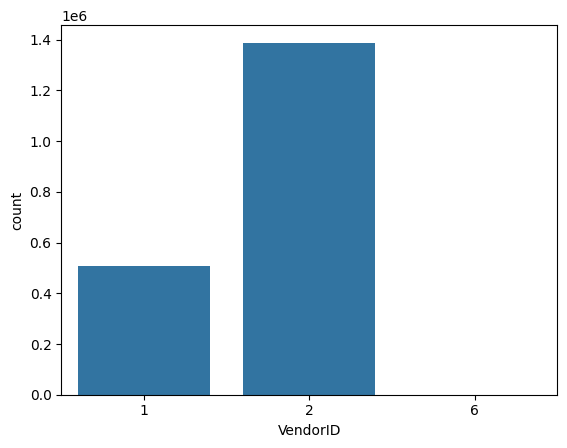

In [ ]:
sns.countplot(data = trip_records_copy_2, x = trip_records_copy_2['VendorID'])
plt.show()
# Insight 1 : Most of the rides were taken by VeriFone Inc.
# Insight 2 : Average rides were taken by Creative Mobile Technologies.
# Summary : We can increase number of vehicles for VeriFone Inc Vendor to generate more income.

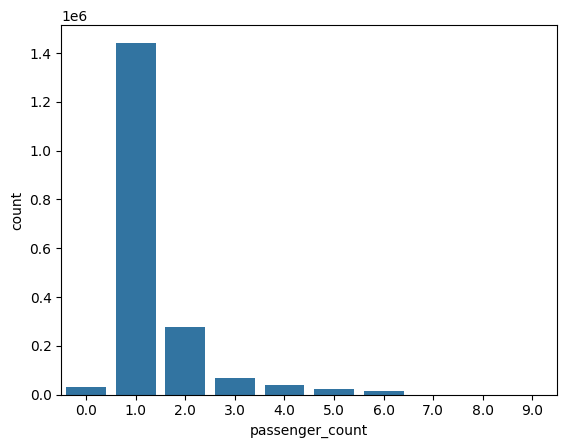

In [ ]:
sns.countplot(data = trip_records_copy_2, x = trip_records_copy_2.passenger_count)
plt.show()
# Insight 1 : In maximum rides mostly one person rides were taken more.
# Insight 2 : Passenger count is in the range from 0 to 6.
# Summary : As 1 person rides are more, in future we must be aware that 1 person rides takes place more.

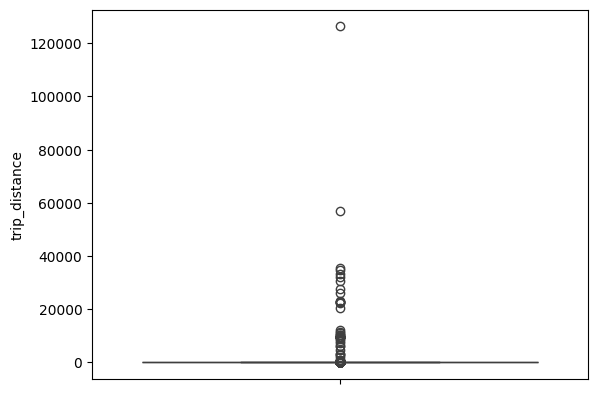

In [ ]:
sns.boxplot(trip_records_copy_2.trip_distance)
plt.show()
# Analysis 1 : Most of the trip distances were in the range from 0 to 60000.
# Analysis 2 : There one value with 120000 which was outside the average range.
# Analysis 3 : Most of the trip distances took place were from 0 to 40,000 miles.
# Summary : In future drivers need to have the fuel in vehicles which he/she drive upto to 40,000 miles at a stretch.

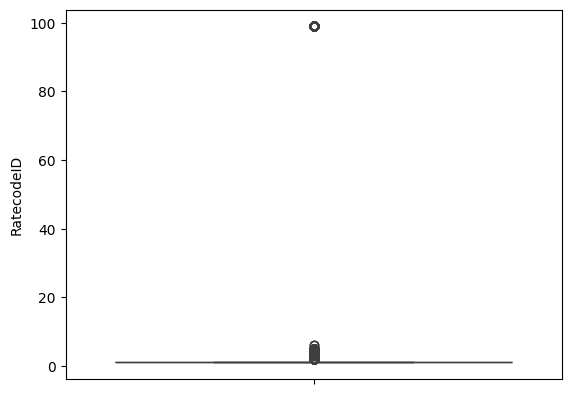

In [ ]:
sns.boxplot(trip_records_copy_2['RatecodeID'])
plt.show()
# Insight 1 : There is only one outlier in this scenario.
# Insight 2 : All the Ratecode ID's were present from 1 to 6 which was expected range.

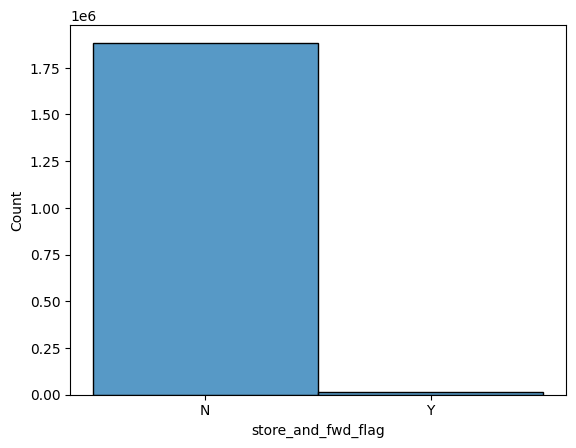

In [ ]:
sns.histplot(trip_records_copy_2.store_and_fwd_flag)
plt.show()
# Analysis : Most of the rides were not stored in app. And only less rides were stored in app which almost may be 1.
# Summary 1 : In future we need to work System on efficiency to connect Vehicle to the server.
# Summary 2 : For any organization storing rides is important for their future purposes.
# Summary 3 : Proficient people must be hired to make the connection upto mark.

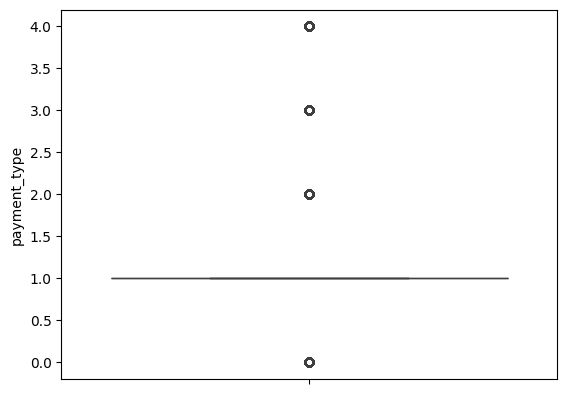

In [ ]:
sns.boxplot(trip_records_copy_2.payment_type)
plt.show()
# Analysis 1 : Most of the people who took ride have done their payment using Cedit Card
# Analysis 2 : All the payment types are by using Credit card, cash, no charge and dispute.

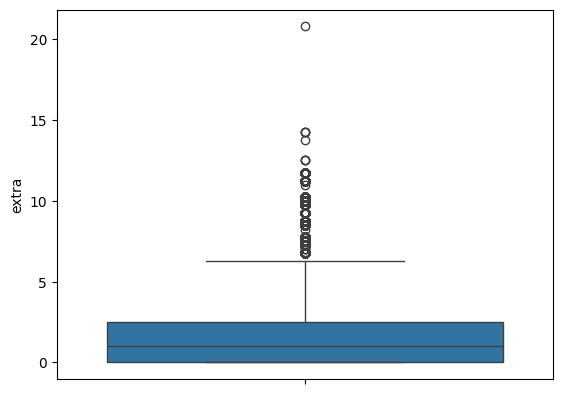

In [ ]:
sns.boxplot(trip_records_copy_2['extra'])
plt.show()
# Insight : Extra charges paid by customers are in range of 0 and 15.

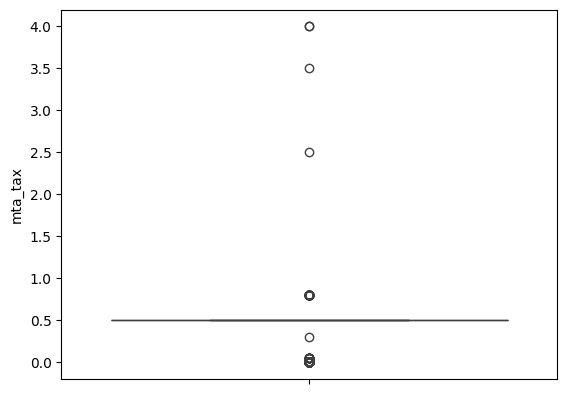

In [ ]:
sns.boxplot(trip_records_copy_2['mta_tax'])
plt.show()
# Insight : Automatic meter tax is triggered in thr range from 0 to 4 .

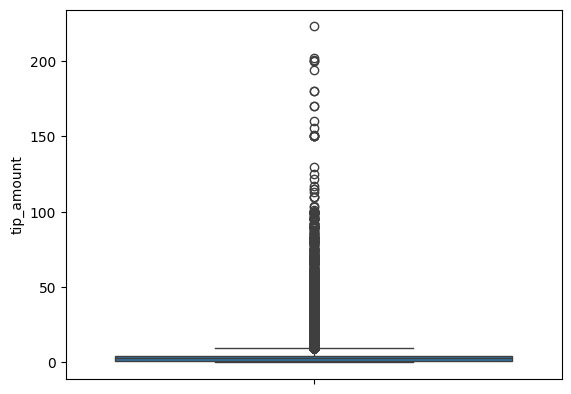

In [ ]:
sns.boxplot(trip_records_copy_2['tip_amount'])
plt.show()
# Insight : Tip amount give a person who took ride varies with each and every person. Most of the amount ranges from 0 to 200

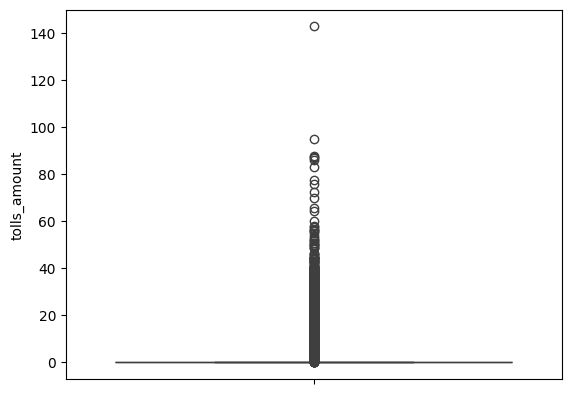

In [ ]:
sns.boxplot(trip_records_copy_2['tolls_amount'])
plt.show()
# Insight : Most of the Toll amount paid for toll charge is in the range between 0 to 100

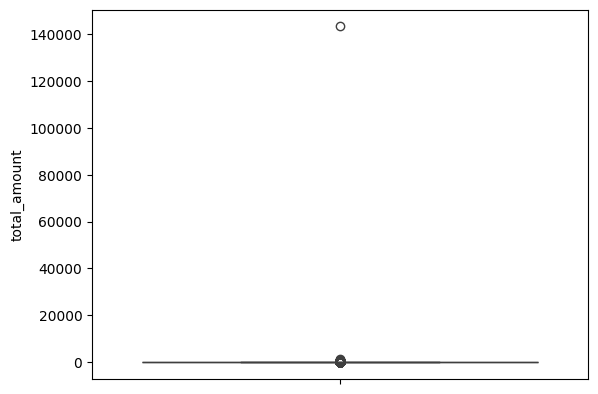

In [ ]:
sns.boxplot(trip_records_copy_2['total_amount'])
plt.show()

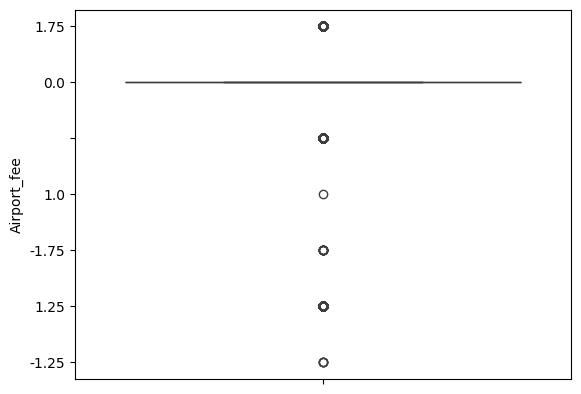

In [ ]:
sns.boxplot(trip_records_copy_2['Airport_fee'])
plt.show()
# Insight : The customers who kept pickup at airport have paid below charges.

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
trip_records_copy_3 = trip_records_copy_2[trip_records_copy_2['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling

In [ ]:
# Store all categorical columns in seperate list
categorical_columns = list(trip_records_copy_3.columns[trip_records_copy_3.dtypes == 'object'])
# Store all numerical columns in seperate list
numerical_columns = list(trip_records_copy_3.columns[trip_records_copy_3.dtypes != 'object'])

In [ ]:
# Now let's Perform "Capping" & "Flooring" for all the columns

for col in numerical_columns :

  q1 = trip_records_copy_3[col].describe() ["25%"]
  q3 = trip_records_copy_3[col].describe() ["75%"]
  iqr = q3 - q1
  lower_whisker = q1 - 1.5 * iqr
  upper_whisker = q3 + 1.5 * iqr

  trip_records_copy_3[col] = np.where(trip_records_copy_3[col] < lower_whisker, lower_whisker, trip_records_copy_3[col])
  trip_records_copy_3[col] = np.where(trip_records_copy_3[col] > upper_whisker, upper_whisker, trip_records_copy_3[col])

In [ ]:
# After performing outlier handling run the cells which detect outliers which are present in previous cells.

In [ ]:
# Do any columns need standardising?
# In data science, outliers are data points that significantly deviate from the general pattern or average of a dataset,
# potentially indicating errors, rare events, or genuine variability.
trip_records_copy_3

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2.0,2023-07-01 00:16:20,2023-07-01 00:49:22,1.0,6.925,1.0,N,132.0,61.0,1.0,40.8,1.0,0.5,9.55,0.0,1.0,53.41,2.5,1.75
1,2.0,2023-07-01 00:00:15,2023-07-01 00:31:42,1.0,6.925,1.0,N,230.0,95.0,1.0,40.8,1.0,0.5,4.00,0.0,1.0,53.41,2.5,0.0
2,2.0,2023-07-01 00:51:04,2023-07-01 00:56:50,1.0,1.420,1.0,N,107.0,162.0,1.0,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.0
3,2.0,2023-07-01 00:37:46,2023-07-01 00:45:30,1.0,1.100,1.0,N,249.0,79.0,1.0,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0
4,2.0,2023-07-01 00:00:34,2023-07-01 00:16:34,1.0,3.200,1.0,N,142.0,41.0,1.0,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2.0,2023-10-31 23:41:43,2023-10-31 23:46:49,1.0,0.860,1.0,N,79.0,4.0,1.0,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.0
1896396,2.0,2023-10-31 23:53:43,2023-11-01 00:01:51,1.0,1.170,1.0,N,246.0,100.0,1.0,9.3,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0
1896397,2.0,2023-10-31 23:55:52,2023-11-01 00:02:03,1.0,0.680,1.0,N,79.0,114.0,1.0,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.0
1896398,2.0,2023-10-31 23:14:34,2023-10-31 23:21:37,1.0,0.300,1.0,N,249.0,249.0,1.0,7.9,1.0,0.5,3.23,0.0,1.0,16.13,2.5,0.0


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
trip_records_copy_3.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# divide tpep_pickup_datetime column into 2 columns one with pickup_date and other with pickup time
trip_records_copy_3['Pickup_Date'] = trip_records_copy_3['tpep_pickup_datetime'].apply(lambda x: x.split()[0])
trip_records_copy_3['Pickup_Time'] = trip_records_copy_3['tpep_pickup_datetime'].apply(lambda x: x.split()[1])

# divide tpep_dropoff_datetime column into 2 columns one with dropoff_date and other with dropoff_time
trip_records_copy_3["Dropoff_Date"] = trip_records_copy_3["tpep_dropoff_datetime"].apply(lambda x: x.split()[0])
trip_records_copy_3["Dropoff_Time"] = trip_records_copy_3["tpep_dropoff_datetime"].apply(lambda x: x.split()[1])

In [ ]:
# Find and show the hourly trends in taxi pickups and taxi dropoff's

In [ ]:
# Create a specific column for Pickup Hour and Dropoff Hour
trip_records_copy_3['pickup_hour'] = trip_records_copy_3['Pickup_Time'].apply(lambda x: x.split(':')[0])
trip_records_copy_3['dropoff_hour'] = trip_records_copy_3['Dropoff_Time'].apply(lambda x: x.split(':')[0])

In [ ]:
trip_records_copy_3['pickup_hour'] = trip_records_copy_3['pickup_hour'].astype('int64')
trip_records_copy_3['dropoff_hour'] = trip_records_copy_3['dropoff_hour'].astype('int64')

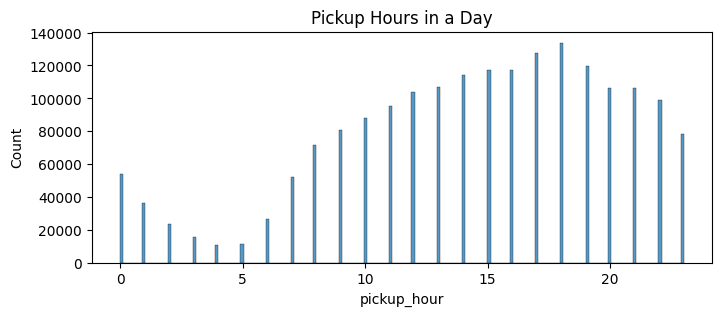

In [ ]:
plt.figure(figsize = (8, 3))
sns.histplot(data = trip_records_copy_3, x = trip_records_copy_3.pickup_hour)
plt.title("Pickup Hours in a Day")
plt.show()
# Insight 1 : Pickup Hours in a day range from 12 AM to 11 PM .
# Insight 2 : Most peak time is from 10 AM to 23 PM .

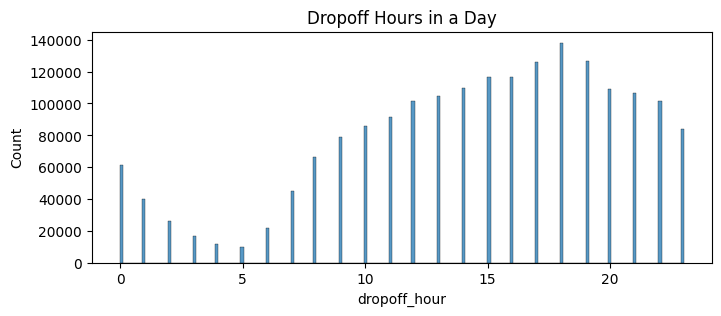

In [ ]:
plt.figure(figsize = (8, 3))
sns.histplot(data = trip_records_copy_3, x = trip_records_copy_3.dropoff_hour)
plt.title("Dropoff Hours in a Day")
plt.show()
# Beautiful Insight : Pickup Hour Graph matches with Dropoff Hour Graph.

In [ ]:
# drop 2 columns abut datetime
trip_records_copy_3.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1, inplace = True)

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

In [ ]:
trip_records_copy_3["Pickup_Date"] = pd.to_datetime(trip_records_copy_3["Pickup_Date"], errors='coerce')
trip_records_copy_3["Dropoff_Date"] = pd.to_datetime(trip_records_copy_3["Dropoff_Date"], errors='coerce')
# error = "coerce" : It handles values that cannot be converted to the target data type
# (e.g., trying to convert "apple" to a number, or "not-a-date" to a datetime).

In [ ]:
# Extract day names
trip_records_copy_3["Day_of_Pickup"] = trip_records_copy_3["Pickup_Date"].dt.day_name()
trip_records_copy_3["Day_of_Dropoff"] = trip_records_copy_3["Dropoff_Date"].dt.day_name()

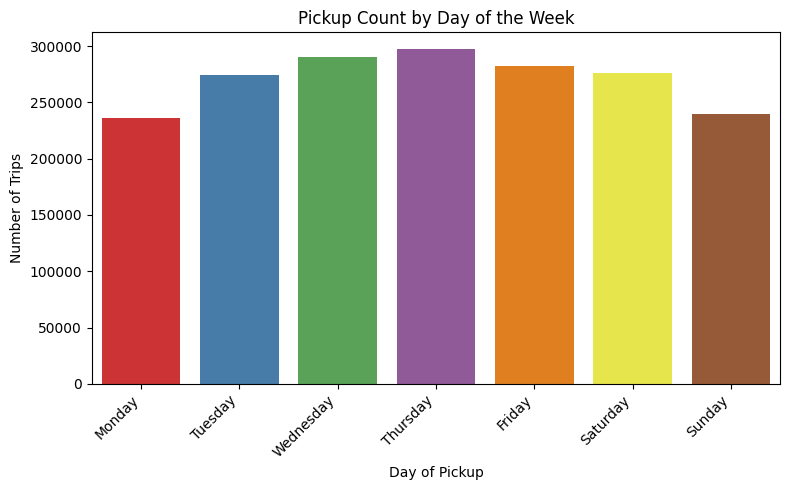

In [ ]:
plt.figure(figsize=(8, 5))                   # Increase figure size for more space
sns.countplot(data=trip_records_copy_3,
              x='Day_of_Pickup',
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette = "Set1")
plt.xticks(rotation = 45, ha ='right')        # Rotate labels 45 degrees, align right edge
plt.title('Pickup Count by Day of the Week')  # Adding a title
plt.xlabel('Day of Pickup')                   # x-axis label
plt.ylabel('Number of Trips')                 # y-axis label
plt.tight_layout()                            # Adjusts plot params for a tight layout, often helps prevent labels cutting off
plt.show()
# Insights : On Thursdays most number of customers took taxies for ride. But on an average every week day is covered with rides.

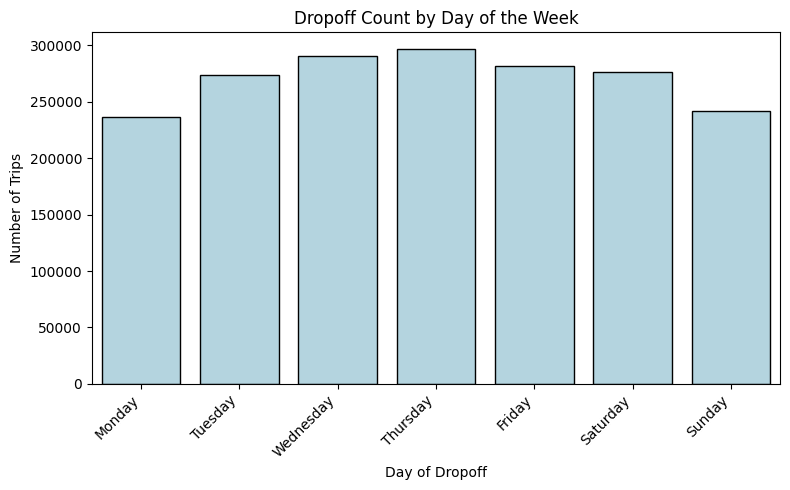

In [ ]:
plt.figure(figsize=(8, 5))                   # Increase figure size for more space
sns.countplot(data=trip_records_copy_3,
              x='Day_of_Dropoff',
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              color = "lightblue", edgecolor = "black")
plt.xticks(rotation = 45, ha ='right')        # Rotate labels 45 degrees, align right edge
plt.title('Dropoff Count by Day of the Week')  # Adding a title
plt.xlabel('Day of Dropoff')                   # x-axis label
plt.ylabel('Number of Trips')                 # y-axis label
plt.tight_layout()                            # Adjusts plot params for a tight layout, often helps prevent labels cutting off
plt.show()
# Insights : Same insights which were in Day_of_Pickup.
# Summarized Pickup : Day_of_Pickup and Day_of_Dropoff visualization is almost same.

In [ ]:
# Show the monthly trends in pickups

In [ ]:
# Extract Month name
trip_records_copy_3["Month_of_Pickup"] = trip_records_copy_3["Pickup_Date"].dt.month_name()
trip_records_copy_3["Month_of_Dropoff"] = trip_records_copy_3["Dropoff_Date"].dt.month_name()

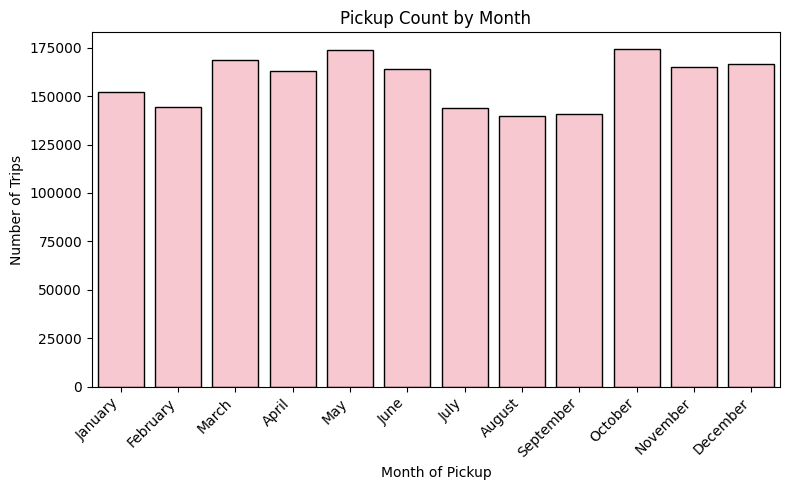

In [ ]:
# Monthly Pickups Visualization

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(8, 5))
sns.countplot(data=trip_records_copy_3, x='Month_of_Pickup', order = month_order, color = 'pink', edgecolor = "black")
plt.xticks(rotation = 45, ha ='right')
plt.title('Pickup Count by Month')
plt.xlabel('Month of Pickup')
plt.ylabel('Number of Trips')
plt.tight_layout() # Adjust layout
plt.show()
# Insight 1 : Most of the pickups took place in October and May.
# Insight 2 : Lowest pickups took place in August and September

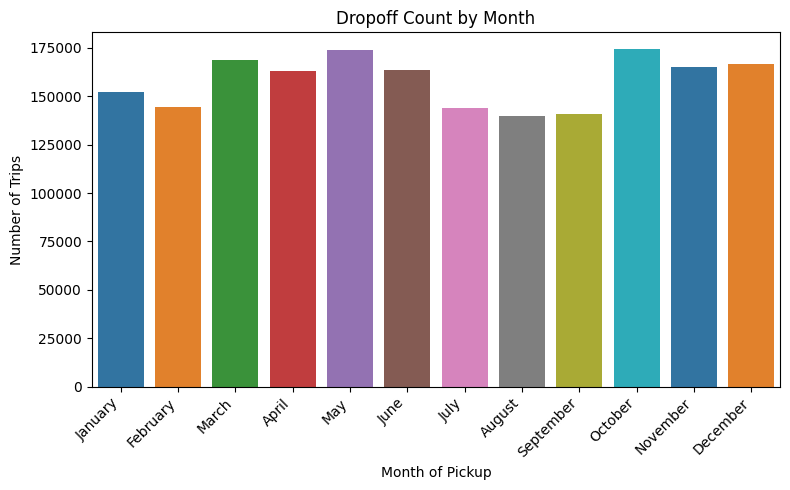

In [ ]:
# Monthly Dropoff's Visualization

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(8, 5))
sns.countplot(data=trip_records_copy_3, x='Month_of_Dropoff', order = month_order, palette='tab10')
plt.xticks(rotation = 45, ha ='right')
plt.title('Dropoff Count by Month')
plt.xlabel('Month of Pickup')
plt.ylabel('Number of Trips')
plt.tight_layout() # Adjust layout
plt.show()
# Insight 1 : Most of the pickups took place in October and May.
# Insight 2 : Lowest pickups took place in August and September
# Summarized Insight : Month_of_Pickup and Drop_of_Pickup have same visualization.

In [ ]:
trip_records_copy_3['trip_duration'] = trip_records_copy_3['dropoff_hour'] - trip_records_copy_3['pickup_hour']

In [ ]:
# Store all categorical columns in seperate list
categorical_columns = list(trip_records_copy_3.columns[trip_records_copy_3.dtypes == 'object'])

# Store all numerical columns in seperate list
numerical_columns = list(trip_records_copy_3.columns[trip_records_copy_3.dtypes != 'object'])

In [ ]:
categorical_columns

['store_and_fwd_flag',
 'Airport_fee',
 'Pickup_Time',
 'Dropoff_Time',
 'Day_of_Pickup',
 'Day_of_Dropoff',
 'Month_of_Pickup',
 'Month_of_Dropoff']

In [ ]:
numerical_columns

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Pickup_Date',
 'Dropoff_Date',
 'pickup_hour',
 'dropoff_hour',
 'trip_duration']

In [ ]:
# as humans we know which is numerical and which is categorical. So if any column is to be changed can be changed mannually.
trip_records_copy_3['Airport_fee'] = trip_records_copy_3['Airport_fee'].replace([np.inf, -np.inf], np.nan)
fill_value = 0
trip_records_copy_3['Airport_fee'] = trip_records_copy_3['Airport_fee'].fillna(fill_value)
trip_records_copy_3['Airport_fee'] = pd.to_numeric(trip_records_copy_3['Airport_fee'], errors='coerce')

In [ ]:
# Remove Airport fee manually from Categorical Columns and add to numerical columns
categorical_columns.remove('Airport_fee')
numerical_columns.append('Airport_fee')

In [ ]:
# Now run categorical_columns list and numerical_columns list

In [ ]:
trip_records_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896379 entries, 0 to 1896399
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   passenger_count        float64       
 2   trip_distance          float64       
 3   RatecodeID             float64       
 4   store_and_fwd_flag     object        
 5   PULocationID           float64       
 6   DOLocationID           float64       
 7   payment_type           float64       
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  Airport_fee            float64       
 17  Pickup_Date            datetime64[ns]
 18  Pickup_Time            obje

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
neg_col = trip_records_copy_3.select_dtypes(include='number').columns[(trip_records_copy_3.select_dtypes(include='number') <= 0).any()]

In [ ]:
neg_col

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'Airport_fee', 'pickup_hour', 'dropoff_hour',
       'trip_duration'],
      dtype='object')

In [ ]:
# Columns named with trip_distance','fare_amount','extra','tip_amount','tolls_amount','total_amount','pickup_hour','dropoff_hour',
# 'Airport_fee' , 'trip_duration' have negative or zero values

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

As analysis heavily relies on distance (e.g., calculating afare per mile, relationship between distance and duration), zero-distance trips are problematic. They lead to division-by-zero errors or nonsensical results (infinite speed, zero fare per mile). Dropping them cleans the data specifically for these calculations.

In [ ]:
# Create a df with non zero entries for the selected parameters.

In [ ]:
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
masked = (trip_records_copy_3['fare_amount'] > 0) & \
       (trip_records_copy_3['tip_amount'] > 0) & \
       (trip_records_copy_3['total_amount'] > 0) & \
       (trip_records_copy_3['trip_distance'] > 0)

In [ ]:
non_zero_df = trip_records_copy_3[masked].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue

In [ ]:
monthly_revenue = non_zero_df.groupby('Month_of_Pickup')['total_amount'].sum()
monthly_revenue

,total_amount
Month_of_Pickup,
April,3250676.43
August,2708142.29
December,3301953.10
February,2829265.31
January,2952947.63
July,2815456.85
June,3335253.03
March,3368299.42
May,3575364.43


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
try:
    # Reindex the Series to match the desired order
    monthly_revenue = monthly_revenue.reindex(month_order, fill_value=0)
except Exception as e:
    print(f"Could not reorder months, proceeding with default order. Error: {e}")

In [ ]:
# This is the key step to make it work nicely with Seaborn's x and y args
monthly_revenue_df = monthly_revenue.reset_index()
monthly_revenue_df.columns

Index(['Month_of_Pickup', 'total_amount'], dtype='object')

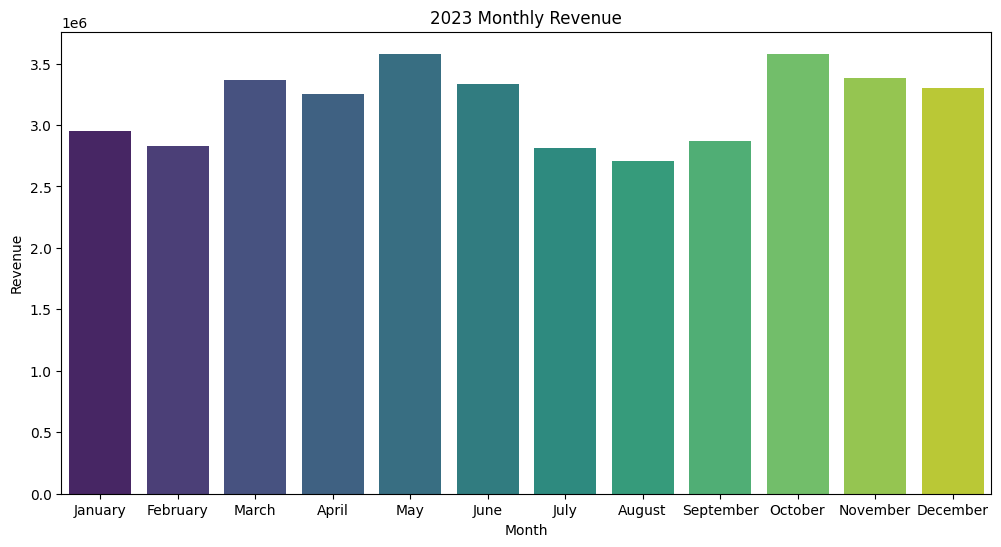

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue_df, x = 'Month_of_Pickup', y='total_amount', palette='viridis')
plt.title('2023 Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

In [ ]:
non_zero_df['Quarter'] = pd.to_datetime(non_zero_df['Pickup_Date']).dt.quarter

In [ ]:
non_zero_df.Quarter.unique()

array([3, 2, 4, 1], dtype=int32)

In [ ]:
tmp1 = non_zero_df.groupby('Quarter')['total_amount'].sum()
tmp1

,total_amount
Quarter,
1,9150512.36
2,10161293.89
3,8395873.04
4,10264898.19


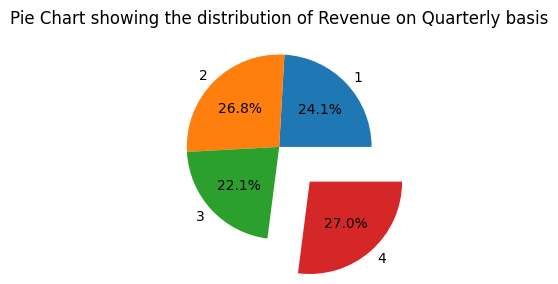

In [ ]:
plt.figure(figsize = (5, 3))
plt.pie(x = tmp1.values, labels = tmp1.index, autopct = '%.1f%%', explode = [0, 0, 0, 0.5])
plt.title('Pie Chart showing the distribution of Revenue on Quarterly basis')
plt.show()
# Insight 1 : Quarter 4 Revenue Income was more in comparision to other Quarters.
# Insight 2 : Quarter 3 possess lowest Revenue Income in comparision to other Quarters.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

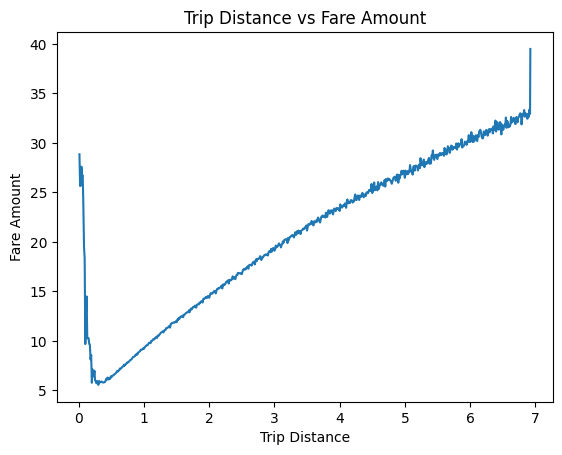

In [ ]:
# Show how trip fare is affected by distance
non_zero_df.groupby('trip_distance')['fare_amount'].mean().plot()
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()
# Insight : Trip Distance is Linearly related with Fare Amount i.e if trip distance increases then fare amount also increases.

In [ ]:
# plot correlation matrix with new datafram table
correlation_matrix = non_zero_df[['trip_distance', 'fare_amount']]
correlation_matrix.corr()

,trip_distance,fare_amount
trip_distance,1.000000,0.948817
fare_amount,0.948817,1.000000


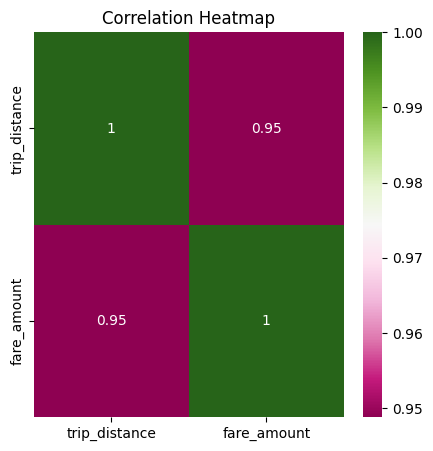

In [ ]:
# Visualize the Correlation between trip_distance and fare_amount using heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

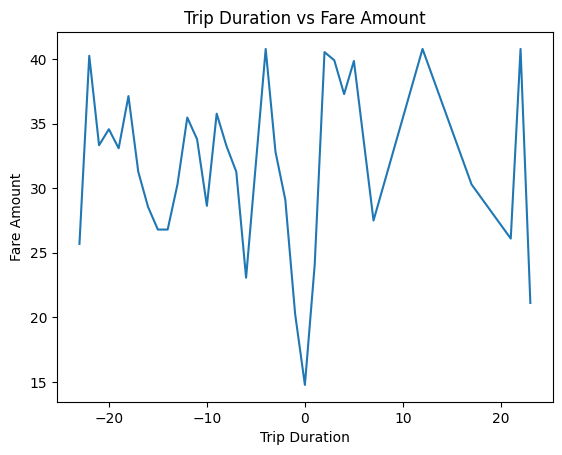

In [ ]:
# Show relationship between fare and trip duration
non_zero_df.groupby('trip_duration')['fare_amount'].mean().plot()
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()
# Insight : If Trip Duration Decreases the Fare Amount also decreases

In [ ]:
corr_matrix_1 = non_zero_df[['fare_amount', 'trip_duration']]
corr_matrix_1.corr()

,fare_amount,trip_duration
fare_amount,1.000000,-0.000473
trip_duration,-0.000473,1.000000


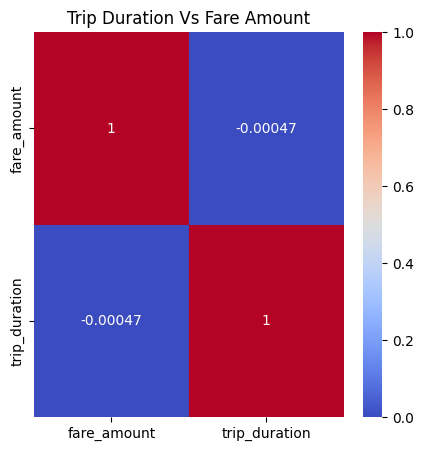

In [ ]:
# Visualize the Correlation between trip_duration and fare_amount using heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_1.corr(), annot=True, cmap='coolwarm')
plt.title('Trip Duration Vs Fare Amount')
plt.show()

In [ ]:
# Show relationship between fare amount and number of passengers
corr_matrix_2 = non_zero_df[['fare_amount', 'passenger_count']]
corr_matrix_2.corr()

,fare_amount,passenger_count
fare_amount,1.0,NaN
passenger_count,NaN,NaN


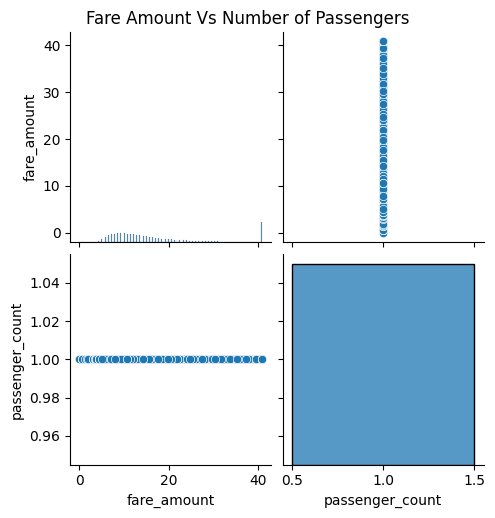

In [ ]:
sns.pairplot(corr_matrix_2)
plt.suptitle('Fare Amount Vs Number of Passengers', y=1.02)
plt.show()
# Insights : Passenger count is 1 every time. Even though fare amount changes on timely basis but passenger count is 1 at maximum times.

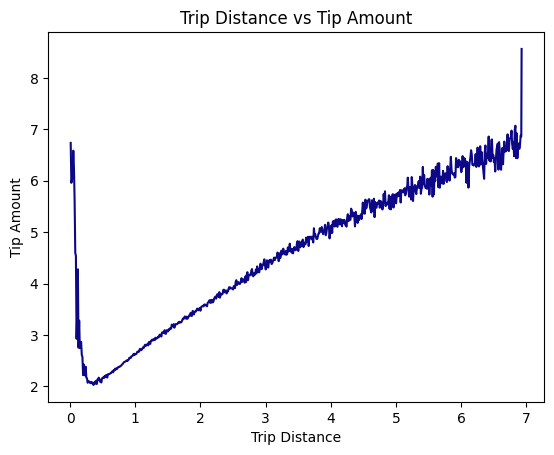

In [ ]:
# Show relationship between tip and trip distance
non_zero_df.groupby('trip_distance')['tip_amount'].mean().plot(cmap = 'plasma')
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()
# Insight : If Trip Distance Increases the Tip Amount also increases. So both of the columns are dependent on each other

In [ ]:
corr_matrix_3 = non_zero_df[['tip_amount', 'trip_distance']]
corr_matrix_3.corr()

,tip_amount,trip_distance
tip_amount,1.000000,0.800236
trip_distance,0.800236,1.000000


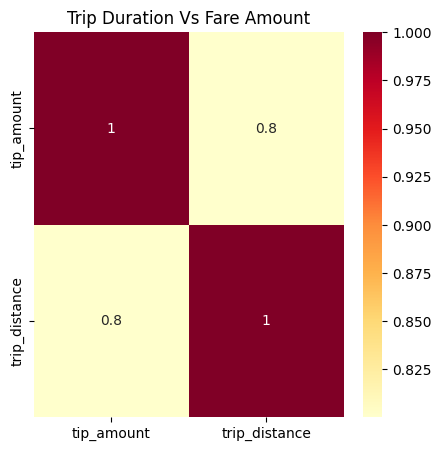

In [ ]:
# Visualize the Correlation between trip_duration and tip_amount using heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix_3.corr(), annot=True, cmap='YlOrRd')
plt.title('Trip Duration Vs Fare Amount')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [ ]:
# Analyse the distribution of different payment types (payment_type)

In [ ]:
non_zero_df['payment_type'].replace([1, 2, 3, 4, 5, 6],
                                    ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided trip'], inplace = True)

In [ ]:
payment_counts = non_zero_df['payment_type'].value_counts()
payment_counts
# Insight : Only Credit card payment is done by customers

,count
payment_type,
Credit Card,1451260


In [ ]:
plot_order = payment_counts.index
plot_order

Index(['Credit Card'], dtype='object', name='payment_type')

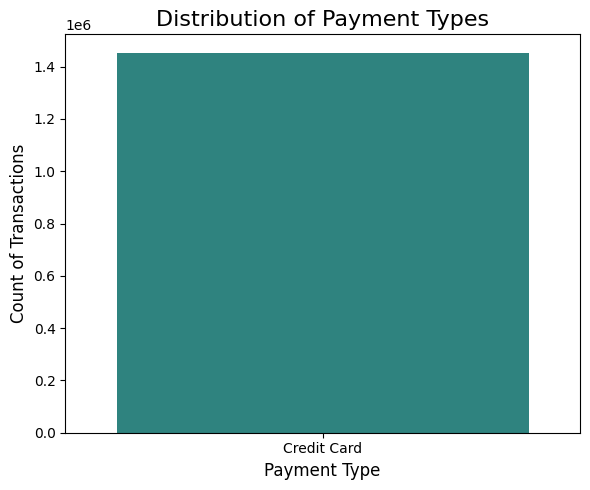

In [ ]:
plt.figure(figsize=(6, 5)) # Set figure size
sns.countplot(x='payment_type', data=non_zero_df, order=plot_order, palette='viridis')
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.tight_layout()
# Insight : Drivers need to maintain creditcard payment machines more because customers are interested in doing creditcard payment.

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas
# GeoPandas is a project to add support for geographic data to pandas objects.
# The goal of GeoPandas is to make working with geospatial data in python easier

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/sample_data/taxi_zones/taxi_zones.shp')

# read the .shp file using gpd
# Use geopandas.read_file() to load the shapefile
# GeoPandas automatically finds and uses the necessary companion files
# (.shx, .dbf, .prj, etc.) as long as they are in the same folder.

zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [ ]:
zones.shape

(263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
print(zones.info())
# no null values present in data

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

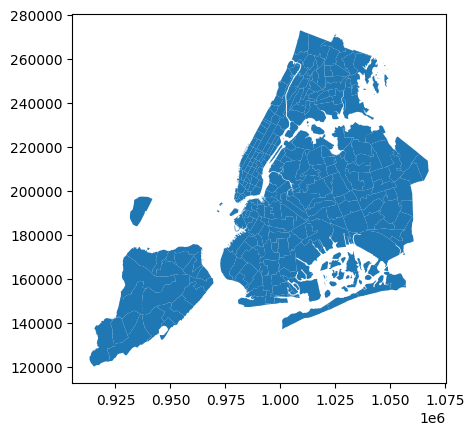

In [ ]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
zones_with_trips = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how ='left')

In [ ]:
zones_with_trips

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Pickup_Date,Pickup_Time,Dropoff_Date,Dropoff_Time,pickup_hour,dropoff_hour,Day_of_Pickup,Day_of_Dropoff,Month_of_Pickup,Month_of_Dropoff,trip_duration,Quarter,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2.0,1.0,6.925,1.0,N,132.0,61.0,Credit Card,40.8,1.0,0.5,9.55,0.0,1.0,53.41,2.5,1.75,2023-07-01,00:16:20,2023-07-01,00:49:22,0,0,Saturday,Saturday,July,July,0,3,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
1,2.0,1.0,6.925,1.0,N,230.0,95.0,Credit Card,40.8,1.0,0.5,4.00,0.0,1.0,53.41,2.5,0.00,2023-07-01,00:00:15,2023-07-01,00:31:42,0,0,Saturday,Saturday,July,July,0,3,230.0,0.031028,0.000056,Times Sq/Theatre District,230.0,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21..."
2,2.0,1.0,1.420,1.0,N,107.0,162.0,Credit Card,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00,2023-07-01,00:51:04,2023-07-01,00:56:50,0,0,Saturday,Saturday,July,July,0,3,107.0,0.038041,0.000075,Gramercy,107.0,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20..."
3,2.0,1.0,1.100,1.0,N,249.0,79.0,Credit Card,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.00,2023-07-01,00:37:46,2023-07-01,00:45:30,0,0,Saturday,Saturday,July,July,0,3,249.0,0.036384,0.000072,West Village,249.0,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."
4,2.0,1.0,3.200,1.0,N,142.0,41.0,Credit Card,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.00,2023-07-01,00:00:34,2023-07-01,00:16:34,0,0,Saturday,Saturday,July,July,0,3,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451285,1.0,1.0,1.300,1.0,N,161.0,90.0,Credit Card,10.7,3.5,0.5,1.75,0.0,1.0,17.45,2.5,0.00,2023-10-31,23:13:47,2023-10-31,23:24:22,23,23,Tuesday,Tuesday,October,October,0,4,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
1451286,2.0,1.0,0.860,1.0,N,79.0,4.0,Credit Card,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00,2023-10-31,23:41:43,2023-10-31,23:46:49,23,23,Tuesday,Tuesday,October,October,0,4,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
1451287,2.0,1.0,0.680,1.0,N,79.0,114.0,Credit Card,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00,2023-10-31,23:55:52,2023-11-01,00:02:03,23,0,Tuesday,Wednesday,October,November,-23,4,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
1451288,2.0,1.0,0.300,1.0,N,249.0,249.0,Credit Card,7.9,1.0,0.5,3.23,0.0,1.0,16.13,2.5,0.00,2023-10-31,23:14:34,2023-10-31,23:21:37,23,23,Tuesday,Tuesday,October,October,0,4,249.0,0.036384,0.000072,West Village,249.0,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
trip_counts = zones_with_trips.groupby('LocationID').size().reset_index(name ='trip_count')
trip_counts

,LocationID,trip_count
0,1.0,37
1,2.0,2
2,4.0,1695
3,6.0,1
4,7.0,358
...,...,...
227,259.0,1
228,260.0,111
229,261.0,7095
230,262.0,20528


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on ='LocationID', right_on='LocationID', how ='left')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

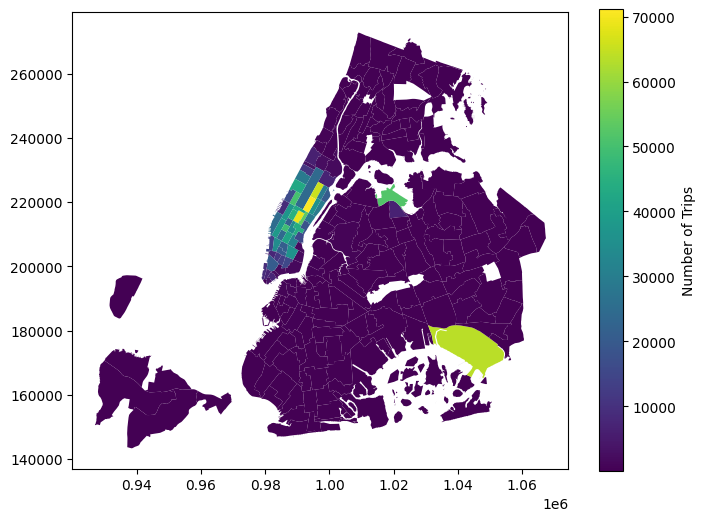

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# Plot the map and display it
zones.plot(column = 'trip_count', ax = ax, legend = True, legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"})
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by = 'trip_count', ascending = False)
zones_sorted

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count_x,trip_count_y,trip_count
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",71102.0,71102.0,71102.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",68712.0,68712.0,68712.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",65276.0,65276.0,65276.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",63831.0,63831.0,63831.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",53428.0,53428.0,53428.0
...,...,...,...,...,...,...,...,...,...,...
203,204,0.101912,0.000641,Rossville/Woodrow,204,Staten Island,"POLYGON ((927766.539 141772.465, 927864.475 14...",NaN,NaN,NaN
205,206,0.212757,0.000944,Saint George/New Brighton,206,Staten Island,"POLYGON ((961436.305 175473.03, 961460.942 175...",NaN,NaN,NaN
213,214,0.135300,0.000812,South Beach/Dongan Hills,214,Staten Island,"POLYGON ((960669.201 156319.132, 960902.551 15...",NaN,NaN,NaN
220,221,0.166218,0.000890,Stapleton,221,Staten Island,"POLYGON ((963349.728 171627.581, 963397.759 17...",NaN,NaN,NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
zones_with_trips['Speed_per_hour'] = zones_with_trips['trip_distance'] / zones_with_trips['trip_duration']

In [ ]:
zones_with_trips.Speed_per_hour.value_counts()
# Insight : -ve values do exist which means speed decreased at those places.

,count
Speed_per_hour,
inf,1063271
6.925000,105790
-0.301087,4726
3.462500,3699
1.400000,3215
...,...
0.115000,1
-1.731250,1
-1.230000,1


In [ ]:
zones_with_trips.Speed_per_hour.nunique()

1657

In [ ]:
zones_with_trips[zones_with_trips['Speed_per_hour'] == 0]
# As there are no values with speed count as 0 in any zone.
# We will consider -ve to be 0 to get better understanding where the Speed count is decreased and where it is good.

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Pickup_Date,Pickup_Time,Dropoff_Date,Dropoff_Time,pickup_hour,dropoff_hour,Day_of_Pickup,Day_of_Dropoff,Month_of_Pickup,Month_of_Dropoff,trip_duration,Quarter,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Speed_per_hour


In [ ]:
# Replace -ve values with 0 value in 'Speed_per_hour' column
zones_with_trips['Speed_per_hour'] = zones_with_trips['Speed_per_hour'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Replace inf and -inf with 0 value in 'Speed_per_hour' column
zones_with_trips['Speed_per_hour'] = zones_with_trips['Speed_per_hour'].replace([np.inf, -np.inf], 0)

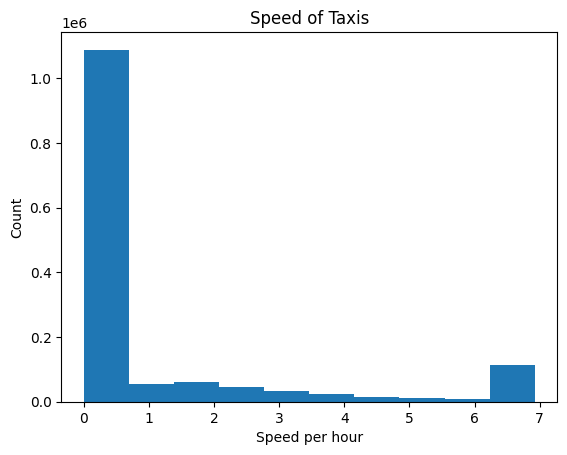

In [ ]:
# Visualize Speed per hour count using bar graph
zones_with_trips['Speed_per_hour'].plot(kind = 'hist')
plt.title('Speed of Taxis')
plt.xlabel('Speed per hour')
plt.ylabel('Count')
plt.show()
# Insight 1 : Speed of Taxi's is low for maximum taxis.
# Insight 2 : It can be due to Heavy traffic at that specific time slot.
# Insight 3 : It can be due to road block which can arrised when accident occurs or something happens on road.

How does identifying high-traffic, high-demand routes help us?

In [ ]:
# If we identify high traffic roads we can route vehicles in shorcut way or any other other route which decreases fuel consumption
# in vehicles. Also helps customers reaching destination in mentioned time frame.
# If Customers are dropped at specific time which is said earlier then it increase reputation of NewYork Taxi Company.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Find number of trips for every hour in pickup
zones_with_trips['pickup_hour'].value_counts()

,count
pickup_hour,
18,105787
17,99412
19,94803
16,88797
15,87642
21,85391
14,84980
20,84864
22,78837


In [ ]:
# Find the busiest hour in pickup
print(zones_with_trips['pickup_hour'].value_counts().max())
print(zones_with_trips['pickup_hour'].value_counts().idxmax())
# Insight : Busiest hour is 18 i.e 6 PM
# Insight : At 6 PM number of vehicles were travelling more i.e 105787 .

105787
18


In [ ]:
# # Find number of trips for every hour in dropoff
non_zero_df['dropoff_hour'].value_counts()

,count
dropoff_hour,
18,108838
19,100006
17,97516
16,87796
15,87068
20,86447
21,85118
22,81234
14,81072


In [ ]:
# Find the busiest hour in dropoff
print(zones_with_trips['dropoff_hour'].value_counts().max())
print(zones_with_trips['dropoff_hour'].value_counts().idxmax())
# Insight : Busiest hour is 18 i.e 6 PM
# Insight : At 6 PM number of vehicles were travelling more i.e 108839 .

108839
18


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips
# nlargest function return n large values.
top_5_busiest_pickup_hours = zones_with_trips['pickup_hour'].value_counts().nlargest(5).index
top_5_busiest_pickup_hours

Index([18, 17, 19, 16, 15], dtype='int64', name='pickup_hour')

In [ ]:
top_5_busiest_dropoff_hours = zones_with_trips['dropoff_hour'].value_counts().nlargest(5).index
top_5_busiest_dropoff_hours
# Insight : Top 5 busiest hours are 18, 17, 19, 16, 15.
# Insight : Top 5 busiest hours are same for both Pickup and Dropoff

Index([18, 19, 17, 16, 15], dtype='int64', name='dropoff_hour')

In [ ]:
# Find the count of trips in top 5 busiest hours of pickup and drop
# Calculate any one among pickup or dropoff
list1 = []
list1.append(top_5_busiest_pickup_hours)
for i in list1 :
    print(zones_with_trips[zones_with_trips['pickup_hour'].isin(i)]['pickup_hour'].value_counts())
# Similarly can be done for dropoff

pickup_hour
18    105787
17     99412
19     94803
16     88797
15     87642
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
zones_with_trips['Day_of_Pickup'].value_counts()

,count
Day_of_Pickup,
Thursday,231095
Wednesday,226769
Friday,214074
Tuesday,212277
Saturday,208688
Sunday,179691
Monday,178696


In [ ]:
zones_with_trips['Day_of_Dropoff'].value_counts()
# Insight : Trip counts on Pickupday and Dropoff day are almost same.
# So we can work on any of the column i.e 'Day_of_Pickup' or 'Day_of_Dropoff'

,count
Day_of_Dropoff,
Thursday,230484
Wednesday,226534
Friday,213421
Tuesday,211867
Saturday,208654
Sunday,181450
Monday,178880


In [ ]:
zones_with_trips[(zones_with_trips['Day_of_Pickup'] == 'Saturday') | (zones_with_trips['Day_of_Pickup'] == 'Sunday')].shape

(388379, 37)

In [ ]:
zones_with_trips[(zones_with_trips['Day_of_Pickup'] != 'Saturday') & (zones_with_trips['Day_of_Pickup'] != 'Sunday')].shape
# Insights : On weekdays Trip count is more which means we need to hire more drivers along with vehicles on weekdays

(1062911, 37)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
# Insight 1 : The above pattern helps us determine on which days of week rides are huge.
# Insight 2 : On Thursday's customers are opting taxi ride largely.
# Insight 3 : On comparision with Weekened's and Weekdays , Weekdays have huge trip bookings.
# Insight 4 : Drivers must be alert on all the days for rides.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup zones
zones_with_trips['PULocationID'].value_counts().head(10)

,count
PULocationID,
237.0,71102
161.0,68712
236.0,65276
132.0,63831
162.0,53428
138.0,51873
142.0,50057
186.0,49143
230.0,45157


In [ ]:
# Find top 10 dropoff zones
zones_with_trips['DOLocationID'].value_counts().head(10)

,count
DOLocationID,
236.0,69015
237.0,63819
161.0,56746
170.0,44051
239.0,43818
142.0,42491
162.0,42297
141.0,40696
230.0,40220


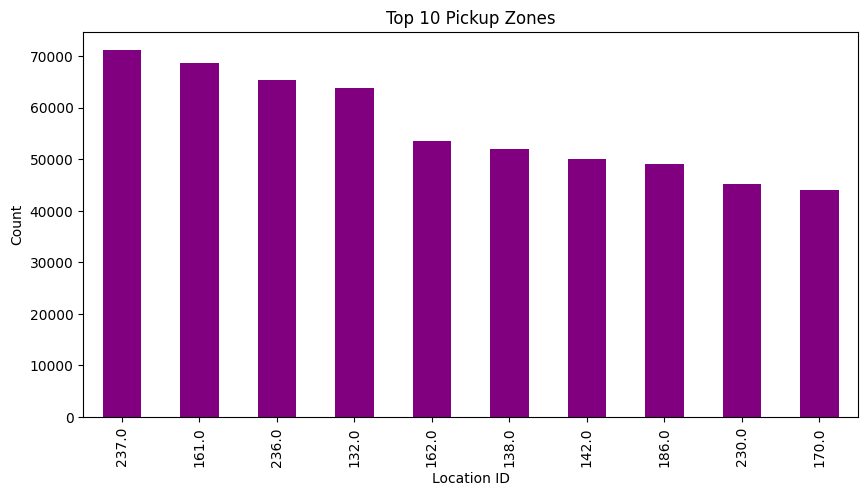

In [ ]:
# Visualize Pickup trends
plt.figure(figsize = (10, 5))
zones_with_trips['PULocationID'].value_counts().head(10).plot(kind = 'bar', color = 'purple')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Location ID')
plt.ylabel('Count')
plt.show()
# Insight : Number of customers boarding at top 10 Locations is shown below for all top 10 zones.

In [ ]:
zones_with_trips.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'Pickup_Date', 'Pickup_Time', 'Dropoff_Date',
       'Dropoff_Time', 'pickup_hour', 'dropoff_hour', 'Day_of_Pickup',
       'Day_of_Dropoff', 'Month_of_Pickup', 'Month_of_Dropoff',
       'trip_duration', 'Quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'Speed_per_hour'],
      dtype='object')

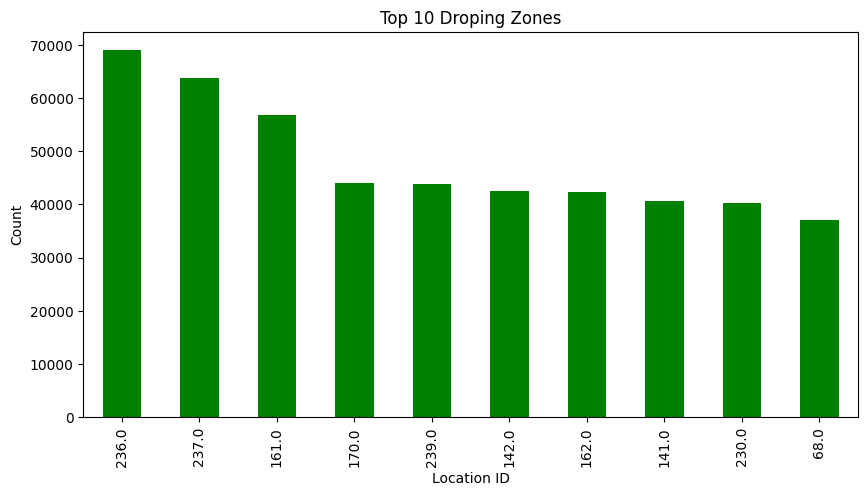

In [ ]:
# Visualize Dropoff trends
plt.figure(figsize = (10, 5))
zones_with_trips['DOLocationID'].value_counts().head(10).plot(kind = 'bar', color = 'green')
plt.title('Top 10 Droping Zones')
plt.xlabel('Location ID')
plt.ylabel('Count')
plt.show()
# Insight 1 : Number of Customers deboarding at top 10 specific locations varies with every Location ID.
# Insight 2 : For Location ID 170.0 and 239.0 Drop offs are equal.

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group by location ID and get pickup and dropoff counts for each zone
zones_with_trips = trip_records_copy_3.groupby('PULocationID').agg(
    Day_of_Pickup_count=('Day_of_Pickup', 'size'),
    Day_of_Dropoff_count=('Day_of_Dropoff', 'size')).reset_index()

# Calculate pickup/dropoff ratio
zones_with_trips['pickup_by_drop_ratio'] = zones_with_trips['Day_of_Pickup_count'] / zones_with_trips['Day_of_Dropoff_count']

# Display the calculated ratio
print(zones_with_trips[['PULocationID', 'pickup_by_drop_ratio']].head(10))
print()
print(zones_with_trips[['PULocationID', 'pickup_by_drop_ratio']].tail(10))

   PULocationID  pickup_by_drop_ratio
0           1.0                   1.0
1           2.0                   1.0
2           3.0                   1.0
3           4.0                   1.0
4           5.0                   1.0
5           6.0                   1.0
6           7.0                   1.0
7           8.0                   1.0
8           9.0                   1.0
9          10.0                   1.0

     PULocationID  pickup_by_drop_ratio
248         256.0                   1.0
249         257.0                   1.0
250         258.0                   1.0
251         259.0                   1.0
252         260.0                   1.0
253         261.0                   1.0
254         262.0                   1.0
255         263.0                   1.0
256         264.0                   1.0
257         265.0                   1.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter the original DataFrame for night hours
night_hours_trips_1 = trip_records_copy_3[(trip_records_copy_3['pickup_hour'] >= 23) | (trip_records_copy_3['pickup_hour'] <= 5)]

# Group by location ID and get pickup and dropoff counts for night hours
zones_with_night_pickup_trips = night_hours_trips_1.groupby('PULocationID').agg(Day_of_Pickup_count=('Day_of_Pickup', 'size')).reset_index()
zones_with_night_dropoff_trips = night_hours_trips_1.groupby('DOLocationID').agg(Day_of_Dropoff_count=('Day_of_Dropoff', 'size')).reset_index()

# Display the top 10 pickup and dropoff zones for night hours
print("Top 10 Pickup Zones during Night Hours:")
print(zones_with_night_pickup_trips.sort_values(by = 'Day_of_Pickup_count', ascending = False).head(10))
print("\nTop 10 Dropoff Zones during Night Hours:")
print(zones_with_night_dropoff_trips.sort_values(by = 'Day_of_Dropoff_count', ascending = False).head(10))

Top 10 Pickup Zones during Night Hours:
     PULocationID  Day_of_Pickup_count
71           79.0                16466
116         132.0                14584
225         249.0                13144
42           48.0                10834
132         148.0                10191
100         114.0                 9193
207         230.0                 8500
166         186.0                 7135
147         164.0                 6468
60           68.0                 6402

Top 10 Dropoff Zones during Night Hours:
     DOLocationID  Day_of_Dropoff_count
77           79.0                  8714
46           48.0                  7220
164         170.0                  6502
66           68.0                  6132
102         107.0                  5946
135         141.0                  5546
255         263.0                  5279
241         249.0                  5128
222         230.0                  4850
142         148.0                  4627


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Find the revenue share for night time hours i.e 11 PM to 5 AM
night_hours_filter = trip_records_copy_3[(trip_records_copy_3['pickup_hour'] >= 23) | (trip_records_copy_3['pickup_hour'] <= 5)]

# Print Revenue share for night time rides
print("Revenue share for night time rides:", night_hours_filter['total_amount'].sum())
# Insight : Night Time Revenue generated is 60 Lakhs thirty three thousand 83 Dollars

Revenue share for night time rides: 6033083.369999999


In [ ]:
# Find the revenue share for day hours i.e 6 AM to 10 PM
# Assumption : Day hours are 6 AM to 10 PM
day_hours_filter = trip_records_copy_3[(trip_records_copy_3['pickup_hour'] < 23) | (trip_records_copy_3['pickup_hour'] > 5)]

# Print Revenue share for day time rides
print("Revenue share for Day time rides:", day_hours_filter['total_amount'].sum())
# Insight : Day Time Revenue generated is 4 Crore's 84 Lakhs 25 Thousand 892 Dollars
# Day Revenue generation is more compared to night time.

Revenue share for Day time rides: 48425892.38


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
zones_with_trips = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how ='left')

In [ ]:
# Run zones_with_trips cell to run this successfully i.e the above cell.
# Analyse the fare per mile per passenger for different passenger counts
zones_with_trips['fare_per_mile_per_passenger'] = zones_with_trips['fare_amount'] / zones_with_trips['passenger_count']
zones_with_trips['fare_per_mile_per_passenger']

,fare_per_mile_per_passenger
0,40.8
1,40.8
2,8.6
3,9.3
4,18.4
...,...
1451285,10.7
1451286,7.2
1451287,7.2
1451288,7.9


In [ ]:
zones_with_trips.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'Pickup_Date', 'Pickup_Time', 'Dropoff_Date',
       'Dropoff_Time', 'pickup_hour', 'dropoff_hour', 'Day_of_Pickup',
       'Day_of_Dropoff', 'Month_of_Pickup', 'Month_of_Dropoff',
       'trip_duration', 'Quarter', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry', 'trip_count_x',
       'trip_count_y', 'trip_count', 'fare_per_mile_per_passenger'],
      dtype='object')

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days of the week with different times of the day.

In [ ]:
zones_with_trips['average_fare_per_mile'] = zones_with_trips['fare_amount'] / zones_with_trips['trip_distance']

In [ ]:
# Compare the average fare per mile for different days of the week
zones_with_trips.groupby('Day_of_Pickup')['average_fare_per_mile'].mean()

,average_fare_per_mile
Day_of_Pickup,
Friday,8.799746
Monday,8.551891
Saturday,8.589632
Sunday,9.043594
Thursday,9.090177
Tuesday,9.005952
Wednesday,8.902615


In [ ]:
# Compare the average fare per mile for different times of the day
zones_with_trips.groupby('pickup_hour')['average_fare_per_mile'].mean()

,average_fare_per_mile
pickup_hour,
0,7.351692
1,8.012026
2,7.811074
3,7.387197
4,8.963790
5,9.974837
6,8.347533
7,8.246402
8,8.576762


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
grouping_columns = ['VendorID','pickup_hour']
aggregation_column = 'average_fare_per_mile'
average_fare_by_vendor_zone_hour = zones_with_trips.groupby(grouping_columns)[aggregation_column].mean()

In [ ]:
average_fare_by_vendor_zone_hour

VendorID  pickup_hour
1.0       0               6.770857
          1               6.753321
          2               6.820077
          3               6.463970
          4               6.752292
          5               6.998287
          6               6.658248
          7               7.178706
          8               7.980662
          9               8.306685
          10              8.333414
          11              8.651842
          12              8.755981
          13              8.658012
          14              8.679833
          15              8.686823
          16              8.655354
          17              8.545790
          18              8.348661
          19              7.842540
          20              7.393060
          21              7.159419
          22              6.996892
          23              6.821180
2.0       0               7.516873
          1               8.371849
          2               8.102616
          3               7.642099
          4               9.536778
          5              10.912307
          6               8.980134
          7               8.657515
          8               8.802735
          9               9.125101
          10              9.103883
          11              9.479252
          12              9.722476
          13              9.748856
          14              9.844546
          15              9.967197
          16             11.184454
          17              9.933815
          18              9.343355
          19              9.222562
          20              7.955780
          21              7.849112
          22              8.137859
          23              8.102518
Name: average_fare_per_mile, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Compare fare rates of different vendors in tiered fashion
zones_with_trips.groupby('VendorID')['fare_amount'].sum()

,fare_amount
VendorID,
1.0,6057797.03
2.0,19062358.78


In [ ]:
# Analyse the average fare per mile for distance upto 2 miles.
zones_with_trips[zones_with_trips['trip_distance'] <= 2].groupby('VendorID')['average_fare_per_mile'].count()

,average_fare_per_mile
VendorID,
1.0,216326
2.0,576961


In [ ]:
# Analyse the fare per mile for distances from 2 to 5 miles
zones_with_trips[(zones_with_trips['trip_distance'] > 2) & (zones_with_trips['trip_distance'] <= 5)].groupby('VendorID')['average_fare_per_mile'].count()

,average_fare_per_mile
VendorID,
1.0,100833
2.0,312842


In [ ]:
# Analyse the fare per mile for more than 5 miles
zones_with_trips[zones_with_trips['trip_distance'] > 5].groupby('VendorID')['average_fare_per_mile'].count()

,average_fare_per_mile
VendorID,
1.0,53614
2.0,190714


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
zones_with_trips['tip_percentage'] = (zones_with_trips['tip_amount'] / zones_with_trips['total_amount']) * 100
zones_with_trips.groupby(['trip_distance', 'passenger_count', 'pickup_hour'])['tip_percentage'].agg('mean')

trip_distance  passenger_count  pickup_hour
0.010          1.0              0              14.209695
                                1              18.383327
                                2              18.471325
                                3              18.840801
                                4              17.880547
                                                 ...    
6.925          1.0              19             16.186564
                                20             16.183470
                                21             16.185962
                                22             16.034128
                                23             15.793384
Name: tip_percentage, Length: 16461, dtype: float64

In [ ]:
zones_with_trips['tip_percentage'].nunique()

24795

In [ ]:
zones_with_trips.tip_percentage.unique()

array([17.88054671,  7.48923423, 16.66666667, ..., 14.82965932,
        0.73800738, 12.52485089])

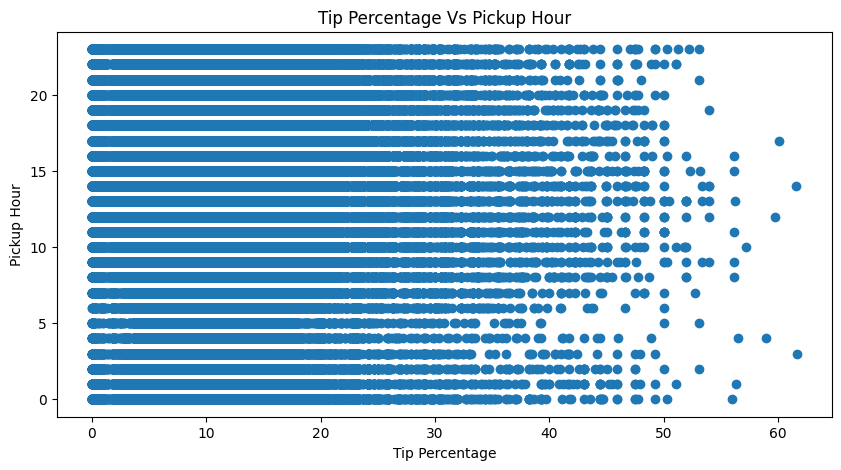

In [ ]:
# Tip Percentage Vs Pickup Hour
plt.figure(figsize = (10, 5))
plt.scatter( data = zones_with_trips, x = 'tip_percentage', y = 'pickup_hour')
plt.xlabel('Tip Percentage')
plt.ylabel('Pickup Hour')
plt.title('Tip Percentage Vs Pickup Hour')
plt.show()
# Insight : Tip amount will be received more when customer is dropped at drop point on time.
#           If the ride gets booked at peak hours then obviously road traffic will be more and time to reach destination will be delayed.
#           This inturn connected to customer feelings.
#           Hence, this column has a very good dependency on Tip Percentage

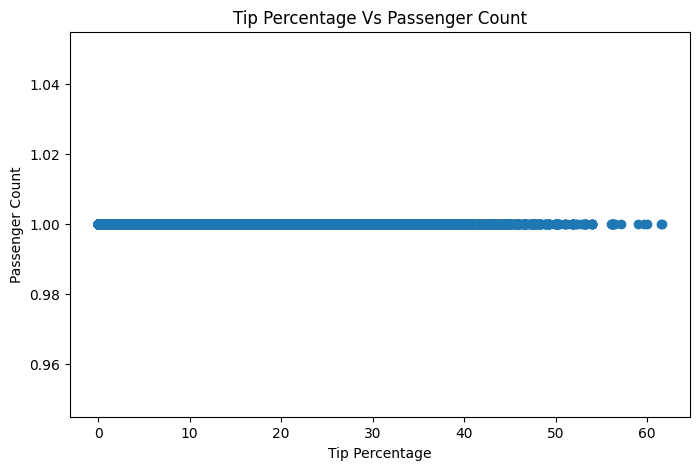

In [ ]:
# Tip Percentage Vs Passenger count
plt.figure(figsize = (8, 5))
plt.scatter( data = zones_with_trips, x = 'tip_percentage', y = 'passenger_count')
plt.title('Tip Percentage Vs Passenger Count')
plt.xlabel('Tip Percentage')
plt.ylabel('Passenger Count')
plt.show()
# Insight : Number of passengers taking the ride does'nt impact Tip Percentage. Anyway passenter count for most of the rides is 1.

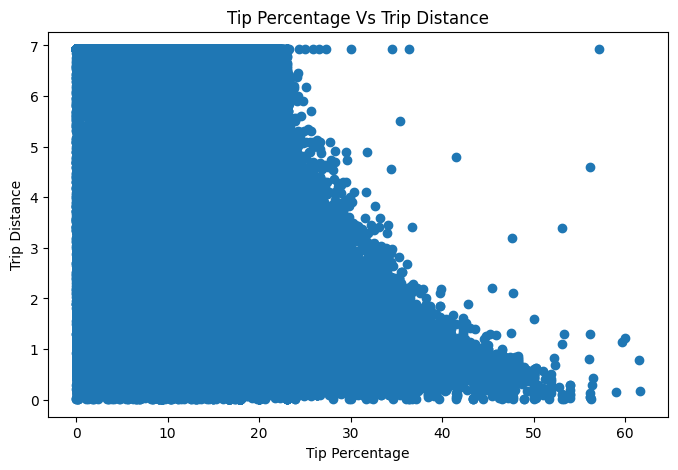

In [ ]:
# Tip Percentage Vs Trip Distance
plt.figure(figsize = (8, 5))
plt.scatter( data = zones_with_trips, x = 'tip_percentage', y = 'trip_distance')
plt.title('Tip Percentage Vs Trip Distance')
plt.xlabel('Tip Percentage')
plt.ylabel('Trip Distance')
plt.show()
# Insight 1 : If Trip distance is more then due to heavy traffic at that time reaching destination gets delayed. Due to which tip given is less.
# Insight 2 : If trip Distance is less then tip given is more because driver reaches destination soon with any traffic jam.
# Insight 3 : Trip distance and Tip Percentage are invercely proportional to each other.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
print(zones_with_trips[zones_with_trips['tip_percentage'] < 10].shape)
print(zones_with_trips[zones_with_trips['tip_percentage'] > 25].shape)
# Insight : Tip with Percentage less than 10 were received more which means maximum driver's did'nt drop customer at drop location on time.

(206528, 42)
(7433, 42)


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
zones_with_trips.groupby(['pickup_hour', 'Day_of_Pickup'])['passenger_count'].count()

pickup_hour  Day_of_Pickup
0            Friday            6419
             Monday            2785
             Saturday         10468
             Sunday           10852
             Thursday          4495
                              ...  
23           Saturday         12321
             Sunday            5031
             Thursday         10356
             Tuesday           7310
             Wednesday         8536
Name: passenger_count, Length: 168, dtype: int64

<Figure size 1200x1200 with 0 Axes>

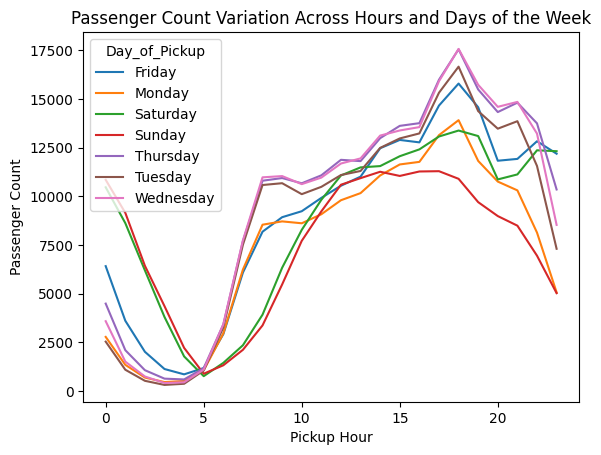

In [ ]:
# Visualize how passenger count varies across hours and days
plt.figure(figsize = (12, 12))
zones_with_trips.groupby(['pickup_hour', 'Day_of_Pickup'])['passenger_count'].count().unstack().plot()
plt.title('Passenger Count Variation Across Hours and Days of the Week')
plt.xlabel('Pickup Hour')
plt.ylabel('Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
zones_with_trips.groupby('LocationID')['passenger_count'].count()

,passenger_count
LocationID,
1.0,37
2.0,2
4.0,1695
6.0,1
7.0,358
...,...
259.0,1
260.0,111
261.0,7095


In [ ]:
location_counts = zones_with_trips.groupby('LocationID')['passenger_count'].count()

<Axes: xlabel='LocationID'>

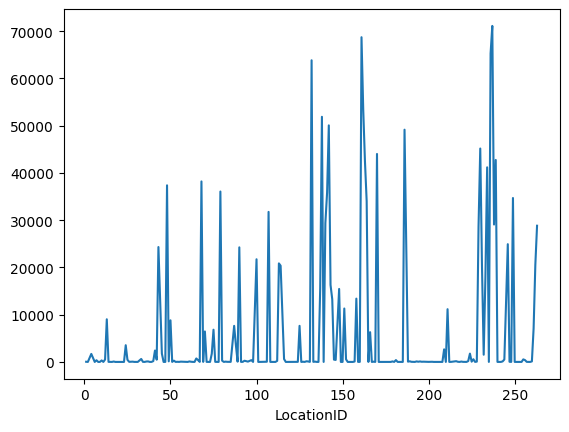

In [ ]:
zones_with_trips.groupby('LocationID')['passenger_count'].count().plot()

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips['average_passenger_count'] = zones_with_trips.groupby('LocationID')['passenger_count'].transform('mean')
zones_with_trips['average_passenger_count'].unique()

array([ 1., nan])

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# With Pickup Location ID
zones_with_trips.groupby(['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge'])[['PULocationID','DOLocationID']].count()

,,,,PULocationID,DOLocationID
extra,mta_tax,improvement_surcharge,congestion_surcharge,,
0.00,0.5,1.0,2.5,548967,548967
0.01,0.5,1.0,2.5,1,1
0.03,0.5,1.0,2.5,1,1
0.19,0.5,1.0,2.5,1,1
0.25,0.5,1.0,2.5,2,2
0.50,0.5,1.0,2.5,11,11
0.70,0.5,1.0,2.5,4,4
0.75,0.5,1.0,2.5,4,4
1.00,0.5,1.0,2.5,290859,290859


In [ ]:
corr_matt_1 = df[['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'PULocationID', 'DOLocationID']].corr()
corr_matt_1
# Insight : extra charges are inversly proportionl to congestion surcharge.

,extra,mta_tax,improvement_surcharge,congestion_surcharge,PULocationID,DOLocationID
extra,1.000000,0.052011,0.022917,-0.020944,-0.040954,-0.004713
mta_tax,0.052011,1.000000,0.188152,0.262441,0.010950,0.049385
improvement_surcharge,0.022917,0.188152,1.000000,0.064457,-0.006254,0.001051
congestion_surcharge,-0.020944,0.262441,0.064457,1.000000,0.129554,0.124882
PULocationID,-0.040954,0.010950,-0.006254,0.129554,1.000000,0.085759
DOLocationID,-0.004713,0.049385,0.001051,0.124882,0.085759,1.000000


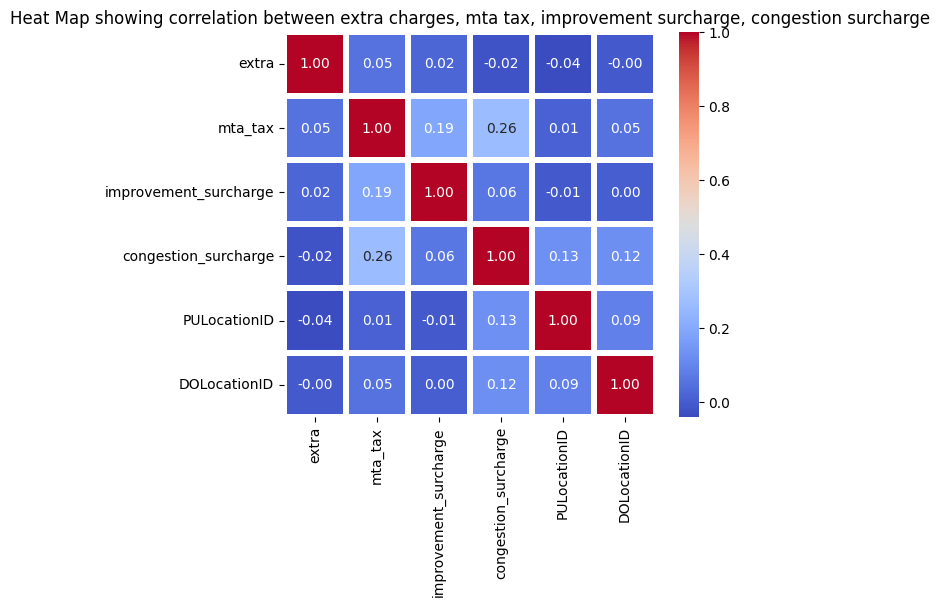

In [ ]:
plt.figure(figsize = (6, 5))
sns.heatmap(data = corr_matt_1, annot = True, fmt = '.2f', linewidths = 3.0, cmap = 'coolwarm')
plt.title('Heat Map showing correlation between extra charges, mta tax, improvement surcharge, congestion surcharge')
plt.show()
# Insight : Extra charges depends on below mentioned details.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Ans :

# Optimizing Routing :
# ---------------------
# Engage best Tour guider or driver of that particulat place / city / town. Tour Guider or driver who knows that place
# well will actually suggest good ideas of routing vehicles in correct, traffic less direction. This inturn helps
# the taxi company in reducing the usage of fuel to taxis. Also Taxi company gets good reputation because of dropping customers
# in desired location on time. Also the drivers get good ratting because of this.

# Dispatching Vehicles based on Demand patterns :
# -----------------------------------------------
# If Operational demand patterns are observed very clearly the, there is no confusion for which vehicle to go in which direction.
# Taxis which good milage must be selected to go to pickup customers who are in city outskirts or any far away region.
# As per observation in horizontal bar graph most of the top 4 Location id's are from 237.0, 161.0, 236.0, 132.0 .
# Above mentioned 4 location ID's must be given first preference to send more number of taxis over ther.
# Later on other Location id's comes into preference.

# Operational Inefficiencies :
# ----------------------------
# Operational inefficiencies must not be done by NYC Taxi company.
# It includes drivers unknowingly going in wrong direction which inturn consumes fuel for the vehicle.
# This is a huge loss to the company.
# All the rides which were booked are notting synched with company application which means comany people can't know which
# vehicle is going in which direction. This must be taken care by officials of the company. Otherwise company may go into Loss.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Ans :
# ---------------------------

# After visualiaing how passenger count varies across hours and days, we can conclude that
# Sunday has the least number of bookings which number of taxis required is less in comparision to other days in any month.
# When compared most of the customers book rides on Thursdays and Wednesdays.
# Next highest bookings happed on Tuesday and next comes friday and so on.

# As per the pattern observerd in days of any month as per that number of vehicles must be present accordingly.
# As per Quarterly patterns it is observed that Q4 is mostly used which means last 3 months in year 2023 is mostly used by customers.
# Q3 months have lowest ride bookings. As per the Quarterly analysis also NYC Taxi company can hire number of drivers.

# As per Monthly revenue generated also we can analyse. Revenue is generated to ride booking in that specific months.
# According to monthly revenue generated October and May month have most of the money generated.
# Next comes March month with Second highest revenue generation. As per per Montly revenue generation also number of drivers hired can be
# impacted. Also Monthly Pickups and Monthly Drops off can impact number of vehicles required and number of drivers required.

# As per Location ID i.e Pickup Location ID and Drop Location ID also Vehicles must be available at that particular spot on time.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Ans :
# -----------

# Most of bookings are done by VeriFone Inc Vendor. Other Vendor named Creative Mobile Technologies also took rides but
# less in comparision to  VeriFone Inc Vendor. So number of vehicles must ne increased for Verifone Inc Company in future.
# So that employees of VeriFone Inc can book more.

# Pricing Strategy must be changes because there are numerous taxes on rides.
# If tax rate increases then number of customers using this application for ride booking decreases.
# So make sure to finalise  1 or 2 tax rates per ride for any customer.
# If these changes are implemented then only Revenue generation will increase soon in future.